# List of Assignments 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Assignment 1. (4 points)

### a) 
Recall the definition of the DTW distance and write a function for evaluating it according to the algorithm described in our lecture.

![](https://i.imgur.com/pT0YaQ1.png)

In [2]:
def DTW_dist(s, t, d=None):
    if d is None:
        d = lambda a, b: np.sqrt((a - b)**2)
    n, m = len(s), len(t)
    DTW = np.ones((n + 1, m + 1)) * np.inf
    DTW[0, 0] = 0
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            DTW[i, j] = d(s[i - 1], t[j - 1]) + min(
                DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1])
    return DTW[n, m]

### b) 
Construct a few simple examples and verify the results of your function with some illustrations of the points that were matched.

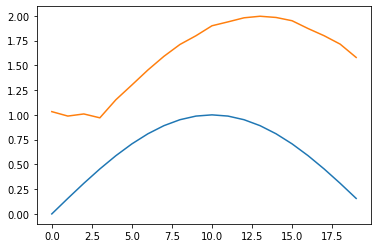

In [3]:
s = np.sin(np.arange(0, 1, 0.05) * np.pi)
t = np.zeros(len(s))
t[3:] = s[:-3]
t += np.random.randn(len(s)) / 50

plt.plot(s)
plt.plot(t + 1)

In [4]:
def plot_matching_points(s, t, d=None, b=1):
    n, m = len(s), len(t)
    DTW = np.ones((n + 1, m + 1)) * np.inf
    DTW[0, 0] = 0

    if d is None:
        d = lambda a, b: np.sqrt((a - b)**2)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            DTW[i, j] = d(s[i - 1], t[j - 1]) + min(
                DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1])

    i, j = n, m
    path = [(n, m)]
    while i != 1 or j != 1:
        options = [DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]]
        options_idxs = [(i - 1, j), (i, j - 1), (i - 1, j - 1)]
        choosen = np.argmin(options)
        i, j = options_idxs[choosen]
        path.append((i, j))

    choosen = np.ones((n, m)) * False
    for i, j in path:
        choosen[i - 1, j - 1] = True

    plt.plot(s, label='S')
    plt.plot(t + b, label=f'T+{b}')

    for i in range(n):
        for j in range(m):
            if choosen[i, j]:
                plt.plot((i, j), (s[i], t[j] + b), color='darkgrey')
    plt.legend()
    plt.show()
    return DTW, choosen, path

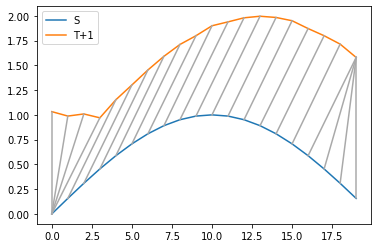

In [5]:
_, _, _ = plot_matching_points(s, t)

### c) 
Generate at least 10 random time series and for each of them create at least 100 random copies with various scaling and shifting. 

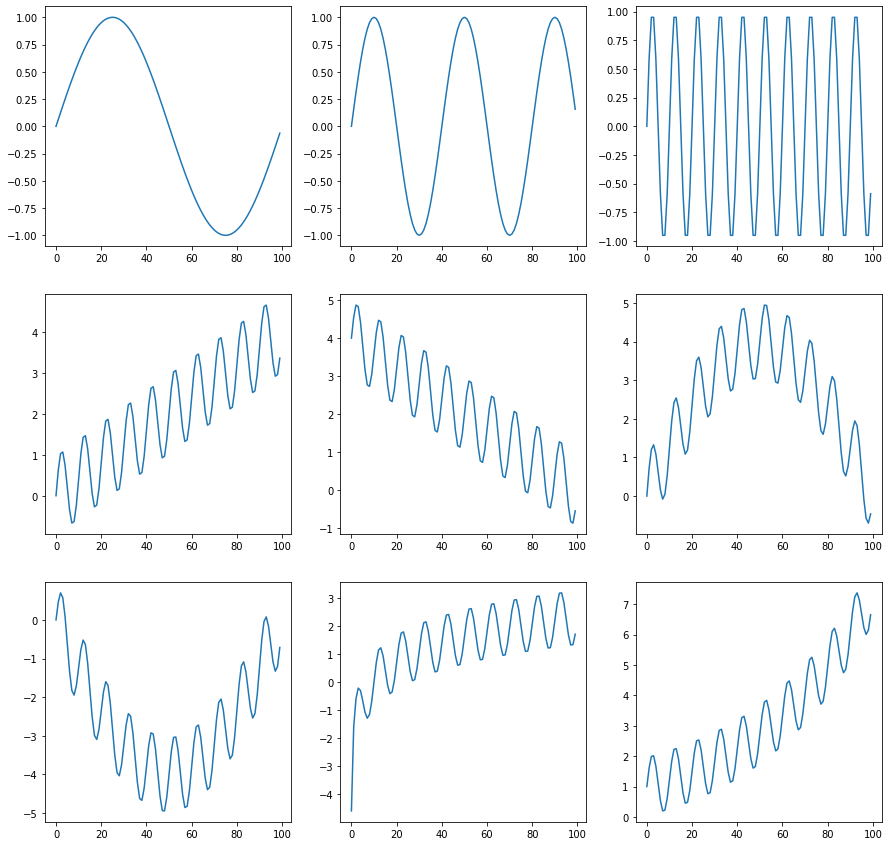

In [6]:
T = [None for _ in range(10)]
T[0] = np.sin(np.arange(0, 1, 0.01) * np.pi)
T[1] = np.sin(np.arange(0, 2, 0.02) * np.pi)
T[2] = np.sin(np.arange(0, 5, 0.05) * np.pi)
T[3] = np.sin(np.arange(0, 20, 0.2) * np.pi)
T[4] = np.sin(np.arange(0, 20, 0.2) * np.pi) + np.arange(0, 4, 0.04)
T[5] = np.sin(np.arange(0, 20, 0.2) * np.pi) + np.arange(4, 0, -0.04)
T[6] = np.sin(
    np.arange(0, 20, 0.2) * np.pi) + np.sin(np.arange(0, 1, 0.01) * np.pi) * 4
T[7] = np.sin(np.arange(0, 20, 0.2) *
              np.pi) + np.cos(np.arange(0.5, 1.5, 0.01) * np.pi) * 4
T[8] = np.sin(np.arange(0, 20, 0.2) * np.pi) + np.log(np.arange(0.01, 10, 0.1))
T[9] = np.sin(np.arange(0, 20, 0.2) * np.pi) + np.exp(np.arange(0, 2, 0.02))

f, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    if T[i] is not None:
        axs[i // 3, i % 3].plot(T[i + 1])

In [46]:
T_with_mutations = []
for t in T:
    # 50
    for alpha in np.arange(0.7, 1.2, 0.02):
        new_t = t[:]
        new_t *= alpha
        T_with_mutations.append(new_t)

        new_t = t[:]
        new_t *= alpha
        new_t += np.random.randn(len(new_t)) / 25
        T_with_mutations.append(new_t)

    # 40
    for d in range(1, 11):
        new_t = np.ones(len(t)) * t[0]
        new_t[d:] = t[:-d]
        T_with_mutations.append(new_t)

        new_t = np.ones(len(t)) * t[0]
        new_t[d:] = t[:-d]
        new_t += np.random.randn(len(new_t)) / 25
        T_with_mutations.append(new_t)

        new_t = np.ones(len(t)) * t[-1]
        new_t[:-d] = t[d:]
        T_with_mutations.append(new_t)

        new_t = np.ones(len(t)) * t[-1]
        new_t[:-d] = t[d:]
        new_t += np.random.randn(len(new_t)) / 25
        T_with_mutations.append(new_t)

    # 10
    for d in np.arange(-0.10, 0.16, 0.05):
        if d == 0.0:
            continue
        new_t = t[:]
        new_t += d
        T_with_mutations.append(new_t)

        new_t = t[:]
        new_t += d
        new_t += np.random.randn(len(new_t)) / 25
        T_with_mutations.append(new_t)

### d) 
Evaluate the DTW distance matrix between these time series using your function. If possible, increase the number of the time series and compare the computation time

In [160]:
t0 = time.time()
n = 100
DM = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        DM[i, j] = DTW_dist(T_with_mutations[i], T_with_mutations[j])
t = time.time() - t0
t

434.44758796691895

Total time would be ~ 434*100 sec = 12h

## Assignment 2. (4 points)
Improve your DTW distance function in the following way:

### 1.
reduce the frequency of the time series or shrink the time series by removing some observations 

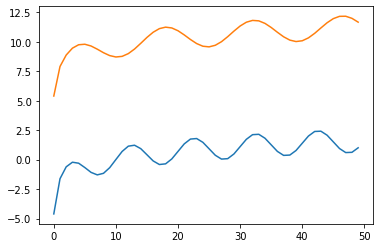

In [84]:
s = np.sin(np.arange(0, 10, 0.2) * np.pi) + np.log(np.arange(0.01, 5, 0.1))
t = np.sin(np.arange(0, 10, 0.14) * np.pi)[:50] + np.log(
    np.arange(0.01, 5, 0.07))[:50]

n, m = len(s), len(t)

plt.plot(s)
plt.plot(t + 10)

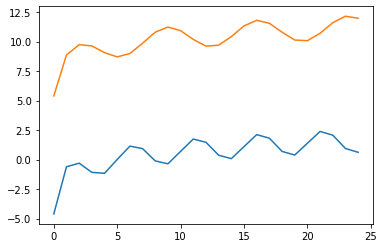

In [8]:
K = 2
reduced_s = s[::K]
reduced_t = t[::K]
plt.plot(reduced_s)
plt.plot(reduced_t + 10)

### 2.
evaluate the DTW distance on the reduced time series 

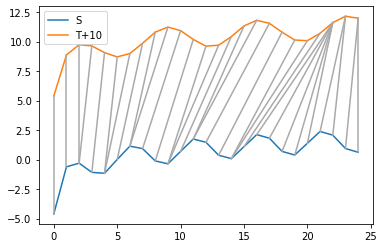

In [9]:
DTW, matching, path = plot_matching_points(reduced_s, reduced_t, b=10)

### 3.
transfer the assignment of the corresponding points from the reduced time series to the original time series

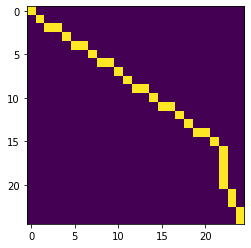

In [10]:
plt.imshow(matching)

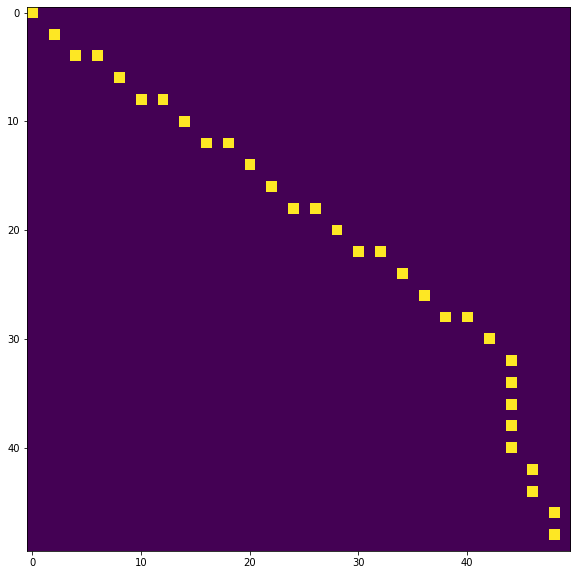

In [11]:
org_matching = np.ones((n, m)) * False
for i, j in path:
    org_matching[K * (i - 1), K * (j - 1)] = True
plt.figure(figsize=(10, 10))
plt.imshow(org_matching)

In [12]:
path = (np.array(path) - 1) * K

In [13]:
new_path = []
i, j = path[0]
while i != n - 1:
    i += 1
    j += 1
    new_path.append((i, j))
for idx, (i, j) in enumerate(path[:-1]):
    next_i, next_j = path[idx + 1]
    new_path.append((i, j))
    if i == next_i:
        for d in range(1, K):
            new_path.append((i, j - d))
    elif j == next_j:
        for d in range(1, K):
            new_path.append((i - d, j))
    else:
        for d in range(1, K):
            new_path.append((i - d, j - d))
new_path.append((0, 0))

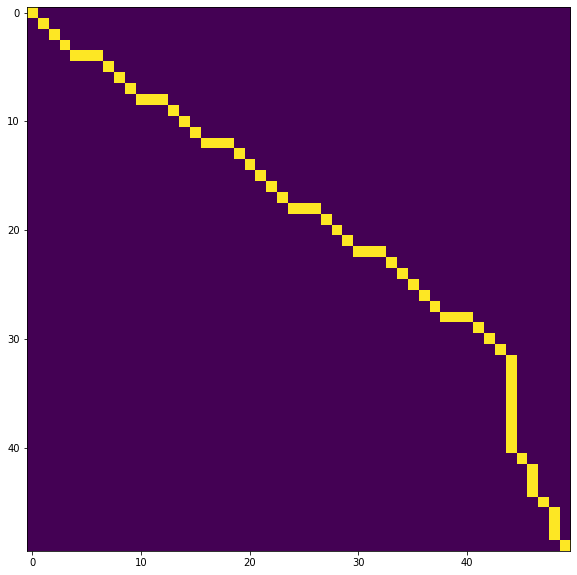

In [14]:
for i, j in new_path:
    org_matching[i, j] = True

plt.figure(figsize=(10, 10))
plt.imshow(org_matching)

### 4.
evaluate the DTW distance on the original time series with the transferred assignment of the corresponding points

In [15]:
dist = 0
d = lambda a, b: np.sqrt((a - b)**2)
for i, j in new_path:
    dist += d(s[i], t[j])
dist

19.63930739886782

In [16]:
DTW_dist(s, t)

14.803625828068911

### 5.
try to reduce the distance by some local changes in the assignment (such as moving an assignment a few time instances back or forth) 

In [17]:
modified_path = new_path[:]
for k in range(1, len(modified_path) - 1):
    pi, pj = modified_path[k - 1]
    i, j = modified_path[k]
    ni, nj = modified_path[k + 1]
    if pi == i and ni != i and d(s[i], t[j]) > d(s[ni], t[j]):
        modified_path[k] = (ni, j)
    elif pi != i and ni == i and d(s[i], t[j]) > d(s[pi], t[j]):
        modified_path[k] = (pi, j)
    elif pj == j and nj != j and d(s[i], t[j]) > d(s[i], t[nj]):
        modified_path[k] = (i, nj)
    elif pj != j and nj == j and d(s[i], t[j]) > d(s[i], t[pj]):
        modified_path[k] = (i, pj)

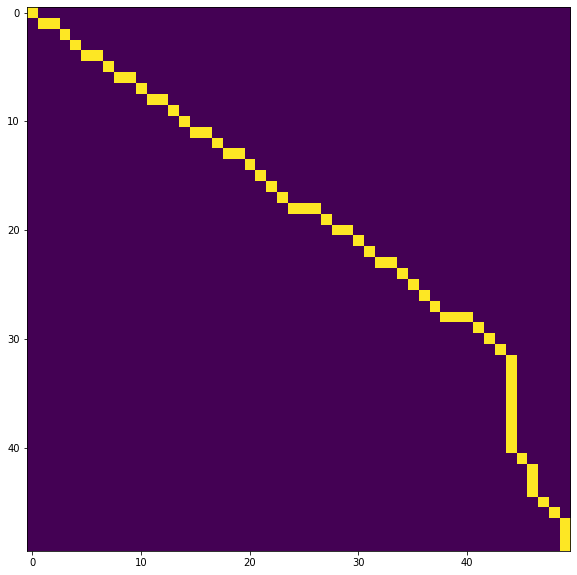

In [18]:
modified_matching = np.ones((n, m)) * False
for i, j in modified_path:
    modified_matching[i, j] = True

plt.figure(figsize=(10, 10))
plt.imshow(modified_matching)

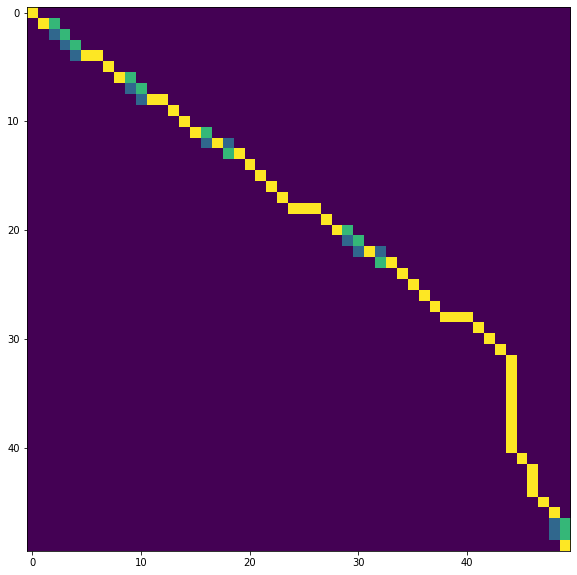

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(org_matching + 2 * modified_matching)

In [20]:
dist = 0
d = lambda a, b: np.sqrt((a - b)**2)
for i, j in modified_path:
    dist += d(s[i], t[j])
dist

17.550325612940984

In [21]:
modified_path = modified_path[:]
for k in range(1, len(modified_path) - 1):
    pi, pj = modified_path[k - 1]
    i, j = modified_path[k]
    ni, nj = modified_path[k + 1]
    if pi == i and ni != i and d(s[i], t[j]) > d(s[ni], t[j]):
        modified_path[k] = (ni, j)
    elif pi != i and ni == i and d(s[i], t[j]) > d(s[pi], t[j]):
        modified_path[k] = (pi, j)
    elif pj == j and nj != j and d(s[i], t[j]) > d(s[i], t[nj]):
        modified_path[k] = (i, nj)
    elif pj != j and nj == j and d(s[i], t[j]) > d(s[i], t[pj]):
        modified_path[k] = (i, pj)

In [22]:
dist = 0
d = lambda a, b: np.sqrt((a - b)**2)
for i, j in modified_path:
    dist += d(s[i], t[j])
dist

17.44081146278424

### 6.
Compare the results and the computation time of the improved function with the regular DTW function written in Assignment 1. You may also compare your approach with FastDTW

In [82]:
def modified_DTW_dist(s, t, d=None, K=2):
    if d is None:
        d = lambda a, b: np.sqrt((a - b)**2)

    reduced_s = s[::K]
    reduced_t = t[::K]

    n, m = len(reduced_s), len(reduced_t)
    DTW = np.ones((n + 1, m + 1)) * np.inf
    DTW[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            DTW[i, j] = d(reduced_s[i - 1], reduced_t[j - 1]) + min(
                DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1])

    i, j = n, m
    path = [(n - 1, m - 1)]
    while i != 1 or j != 1:
        options = [DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]]
        options_idxs = [(i - 1, j), (i, j - 1), (i - 1, j - 1)]
        choosen = np.argmin(options)
        i, j = options_idxs[choosen]
        path.append((i - 1, j - 1))

    path = np.array(path) * K

    new_path = []
    i, j = path[0]
    n, m = len(s), len(t)
    while i != n - 1:
        i += 1
        j += 1
        new_path.append((i, j))
    for idx, (i, j) in enumerate(path[:-1]):
        next_i, next_j = path[idx + 1]
        new_path.append((i, j))
        if i == next_i:
            for o in range(1, K):
                new_path.append((i, j - o))
        elif j == next_j:
            for o in range(1, K):
                new_path.append((i - o, j))
        else:
            for o in range(1, K):
                new_path.append((i - o, j - o))
    new_path.append((0, 0))
    path = new_path

    for _ in range(2):
        modified_path = path[:]
        for k in range(1, len(modified_path) - 1):
            pi, pj = modified_path[k - 1]
            i, j = modified_path[k]
            ni, nj = modified_path[k + 1]
            if pi == i and ni != i and d(s[i], t[j]) > d(s[ni], t[j]):
                modified_path[k] = (ni, j)
            elif pi != i and ni == i and d(s[i], t[j]) > d(s[pi], t[j]):
                modified_path[k] = (pi, j)
            elif pj == j and nj != j and d(s[i], t[j]) > d(s[i], t[nj]):
                modified_path[k] = (i, nj)
            elif pj != j and nj == j and d(s[i], t[j]) > d(s[i], t[pj]):
                modified_path[k] = (i, pj)
        path = modified_path

    dist = 0
    for i, j in path:
        dist += d(s[i], t[j])
    return dist

In [85]:
t0 = time.time()
dist = modified_DTW_dist(s, t)
t1 = time.time() - t0
print(f'Dist: {dist}, time {t1}')

Dist: 17.44081146278424, time 0.0030052661895751953


In [86]:
t0 = time.time()
dist = DTW_dist(s, t)
t1 = time.time() - t0
print(f'Dist: {dist}, time {t1}')

Dist: 14.803625828068911, time 0.00799870491027832


In [91]:
i, j = np.random.randint(0, 1000, 2)

In [92]:
t0 = time.time()
dist = modified_DTW_dist(T_with_mutations[i], T_with_mutations[j], K=3)
t1 = time.time() - t0
print(f'Dist: {dist}, time {t1}')

Dist: 56.118483753458364, time 0.005021095275878906


In [93]:
t0 = time.time()
dist = modified_DTW_dist(T_with_mutations[i], T_with_mutations[j], K=2)
t1 = time.time() - t0
print(f'Dist: {dist}, time {t1}')

Dist: 9.873029456063572, time 0.008010387420654297


In [94]:
t0 = time.time()
dist = DTW_dist(T_with_mutations[i], T_with_mutations[j])
t1 = time.time() - t0
print(f'Dist: {dist}, time {t1}')

Dist: 9.87302945606357, time 0.03299999237060547


In [95]:
t0 = time.time()
n = 100
DM = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        DM[i, j] = modified_DTW_dist(T_with_mutations[i],
                                     T_with_mutations[j],
                                     K=2)
t1 = time.time() - t0
t1

82.53448700904846

Total time would be ~ 82.5*100 sec ~ 137m

## Assignment 3. (4 points)
Please read the notebook Introduction to Time Series Clustering attached to the lecture notes. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import gzip
import pickle
import time

%matplotlib inline

import matplotlib

from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from scipy.stats import entropy

In [2]:
import warnings

warnings.filterwarnings("ignore")

### a) 
Perform the clustering of daily water consumption profiles with DBA-k-means and compare it with the regular k-means approach. 

#### Regular k-means

(84, 144) (84,)


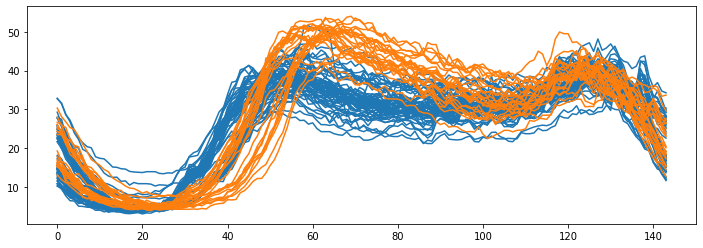

In [41]:
df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [8]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65 * N):].copy()
train_indices = shuffled_indices_[:int(0.65 * N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 144) (54,)
(30, 144) (30,)


In [9]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.24558568000793457


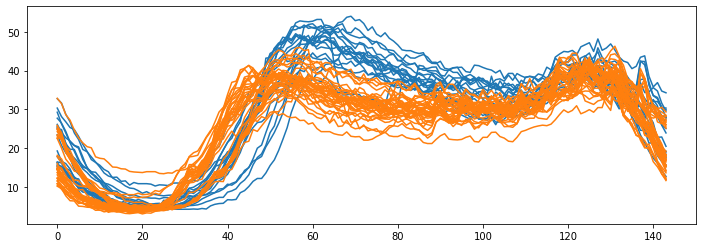

In [10]:
labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

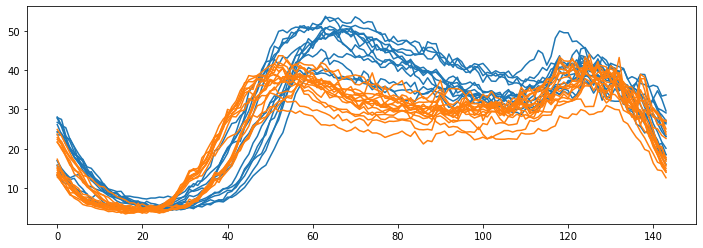

In [11]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [16]:
acc = np.mean(labels == y_test)
if acc < 0.5:
    acc = 1 - acc
acc

0.8666666666666667

In [17]:
confusion_matrix(y_test, labels)

array([[ 3, 16],
       [10,  1]], dtype=int64)

#### DBA-k-means

In [18]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=2,
                            metric='dtw',
                            max_iter_barycenter=100,
                            n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

17.59114933013916


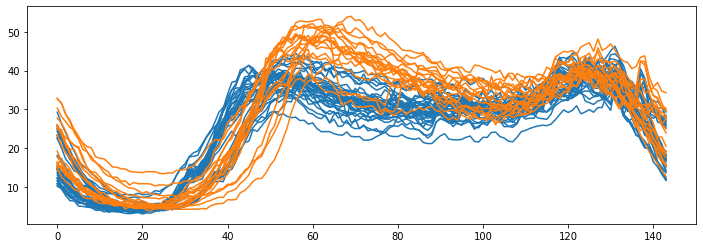

In [24]:
labels = tskmeans.predict(X_train)

plt.figure(figsize=(12, 4))
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

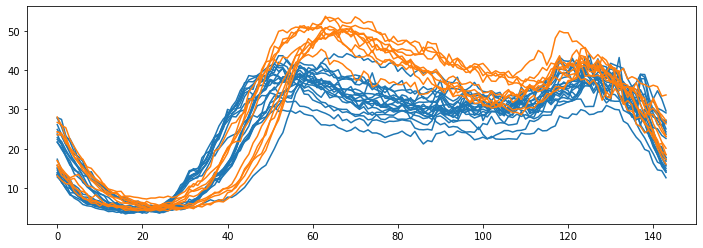

In [25]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [21]:
acc = np.mean(labels == y_test)
if acc < 0.5:
    acc = 1 - acc
acc

0.9

In [22]:
confusion_matrix(y_test, labels)

array([[18,  1],
       [ 2,  9]], dtype=int64)

### b) 
Note that the daily water consumption profiles were aggregated into a type of day-ofweek month-of-year mean profiles (7 x 12 = 84 time series). Please perform the clustering on the non-aggregated data (651 time series) also. 

#### k-means

(651, 144) (651,)


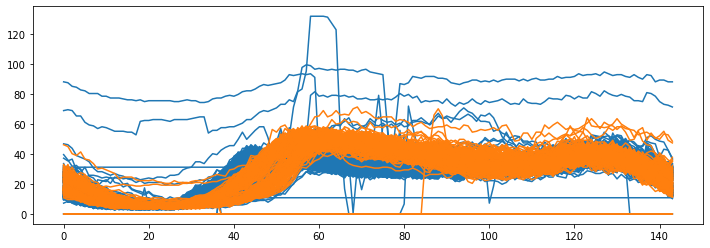

In [3]:
df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
X = df.values[:, 1:]
y = df['date'].dt.dayofweek.map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [4]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65 * N):].copy()
train_indices = shuffled_indices_[:int(0.65 * N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(423, 144) (423,)
(228, 144) (228,)


In [5]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.37186574935913086


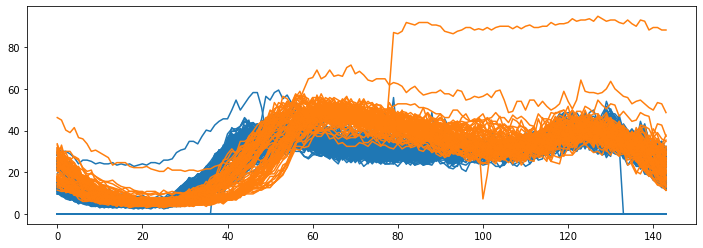

In [6]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [7]:
confusion_matrix(y_test, labels)

array([[142,  17],
       [  7,  62]], dtype=int64)

#### DBA-k-means

In [54]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=2,
                            metric='dtw',
                            max_iter_barycenter=100,
                            n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

152.74607491493225


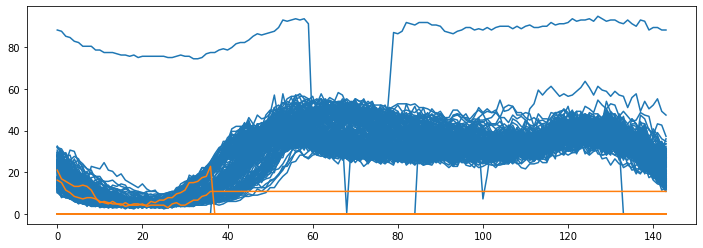

In [55]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [56]:
confusion_matrix(y_test, labels)

array([[152,   5],
       [ 71,   0]], dtype=int64)

### c) 
Please preprocess the input data with smoothing time series by a moving average (replacing the original value with an average of a few previous values) and repeat the clustering. 

(84, 144) (84,)


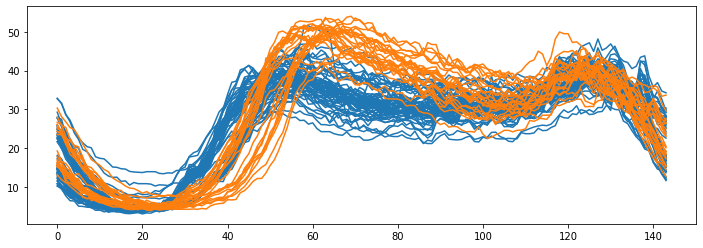

In [57]:
df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [59]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

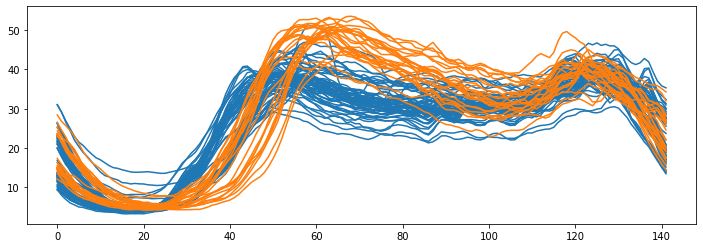

In [66]:
X = np.apply_along_axis(moving_average, 1, X)
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [67]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65 * N):].copy()
train_indices = shuffled_indices_[:int(0.65 * N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 142) (54,)
(30, 142) (30,)


#### k-means

In [68]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.028995513916015625


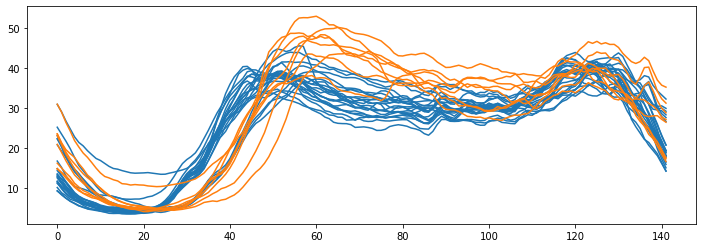

In [70]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [71]:
confusion_matrix(y_test, labels)

array([[22,  3],
       [ 0,  5]], dtype=int64)

#### DBA-k-means

In [72]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=2,
                            metric='dtw',
                            max_iter_barycenter=100,
                            n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

24.127490997314453


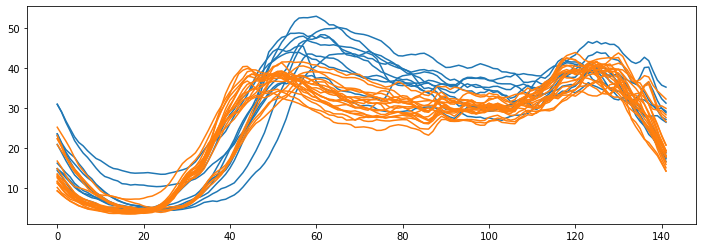

In [73]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [74]:
confusion_matrix(y_test, labels)

array([[ 5, 20],
       [ 5,  0]], dtype=int64)

### d) 
Find the Arrow Head Dataset and the Basic Motion Dataset and try to cluster them with the regular k-means as well as DBA-k-means (please focus only on time series clustering and ignore the class labels in these datasets). 


#### Arrowhead Dataset

In [3]:
df = pd.read_csv('ArrowHead_TRAIN.txt', delimiter="\t", header=None)
X_train = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_train = np.array([int(df.loc[i][0].split(':')[-1]) for i in df.index])

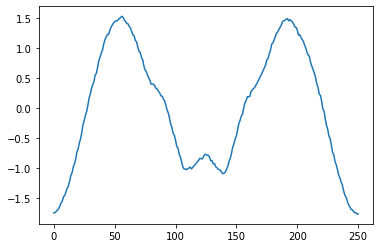

In [4]:
plt.plot(X_train[4, :])

In [5]:
df = pd.read_csv('ArrowHead_TEST.txt', delimiter="\t", header=None)
X_test = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_test = np.array([int(df.loc[i][0].split(':')[-1]) for i in df.index])

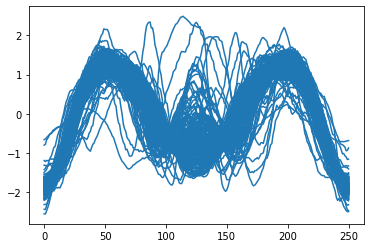

In [6]:
plt.plot(X_test.T, '#1F77B4')
plt.show()

##### k-means

In [7]:
t = time.time()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

print(time.time() - t)

0.3891305923461914


In [8]:
labels = kmeans.predict(X_test)
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
confusion_matrix(y_test, labels)

array([[25, 43,  1],
       [51,  2,  0],
       [50,  1,  2]], dtype=int64)

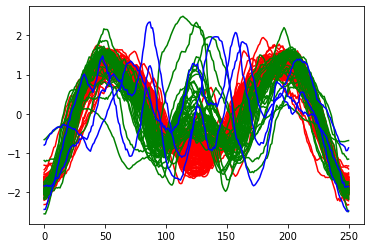

In [11]:
plt.plot(X_test[labels == 0].T, c='red')
plt.plot(X_test[labels == 1].T, c='green')
plt.plot(X_test[labels == 2].T, c='blue')
plt.show()

##### DBA-k-means

In [16]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=3,
                            metric='dtw',
                            max_iter_barycenter=100,
                            n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

8.07125186920166


In [17]:
labels = tskmeans.predict(X_test)
labels

array([2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [18]:
confusion_matrix(y_test, labels)

array([[20, 17, 32],
       [ 0, 43, 10],
       [ 2, 51,  0]], dtype=int64)

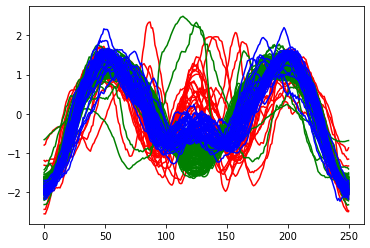

In [19]:
plt.plot(X_test[labels == 0].T, c='red')
plt.plot(X_test[labels == 1].T, c='green')
plt.plot(X_test[labels == 2].T, c='blue')
plt.show()

#### Basic Motion Dataset

In [20]:
df = pd.read_csv('BasicMotions_TRAIN.txt', delimiter="\t", header=None)
X_train = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
D = {'Standing': 0, 'Running': 1, 'Walking': 2, 'Badminton': 3}
y_train = np.array([D[df.loc[i][0].split(':')[-1]] for i in df.index])

In [21]:
df = pd.read_csv('BasicMotions_TEST.txt', delimiter="\t", header=None)
X_test = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_test = np.array([D[df.loc[i][0].split(':')[-1]] for i in df.index])

##### k-means

In [22]:
t = time.time()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

print(time.time() - t)

0.023004531860351562


In [23]:
labels = kmeans.predict(X_test)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
confusion_matrix(y_test, labels)

array([[10,  0,  0,  0],
       [ 7,  1,  1,  1],
       [10,  0,  0,  0],
       [10,  0,  0,  0]], dtype=int64)

##### DBA-k-means

In [26]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=4,
                            metric='dtw',
                            max_iter_barycenter=100,
                            n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

2.380106210708618


In [27]:
labels = tskmeans.predict(X_test)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [28]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [29]:
confusion_matrix(y_test, labels)

array([[10,  0,  0,  0],
       [ 0,  5,  0,  5],
       [10,  0,  0,  0],
       [ 0,  0, 10,  0]], dtype=int64)

## Assignment 4. (6 points)
Please propose an extension of Random Forest algorithm for time series classification based on feature-based representation. You should propose a method to define the  efficient time windows in the time series for evaluating the features. Perform some experiments on the Arrow Head Dataset and the Basic Motion Dataset with the set of features including at least the mean, standard deviation and slope. Please compare your approach with Time Series Forest ([2]) and its implementations in the sktime package ([3]).

[2] H. Deng, G. Runger, E. Tuv, M. Vladimir, "A time series forest for classification and feature extraction". Information Science 239, 2013, pp.142-153.

[3] M. Loning, A. Bagnall, S. Ganesh, V. Kazakov, J. Lines, F. J. Kiraly, "sktime: A Unified Interface for Machine Learning with Time Series". Workshop on Systems for ML at NeurIPS, 2019. 

### Arrowhead

In [3]:
df = pd.read_csv('ArrowHead_TRAIN.txt', delimiter="\t", header=None)
X_train = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_train = np.array([int(df.loc[i][0].split(':')[-1]) for i in df.index])

In [4]:
df = pd.read_csv('ArrowHead_TEST.txt', delimiter="\t", header=None)
X_test = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_test = np.array([int(df.loc[i][0].split(':')[-1]) for i in df.index])

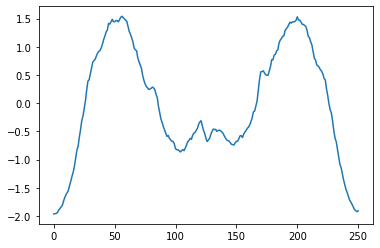

In [5]:
plt.plot(X_train[0, :])

In [6]:
t0 = 70
l = 20
time_window = X_train[0, t0:t0 + l]
mean, std = time_window.mean(), time_window.std()
t_ = np.arange(-(l - 1) / 2, (l - 1) / 2 + 0.001, 1)
time_window_ = time_window - time_window.mean()
slope = (t_.dot(time_window_)) / (t_.dot(t_))
mean, std, slope

(0.23966308250000004, 0.28079154799654427, -0.0458160387593985)

In [7]:
data = []
names = []
len_of_time_window = 10
T0 = range(0, len(X_train[0]), len_of_time_window)
for t0 in T0:
    time_window = X_train[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    data.append(mean)
    data.append(std)
    data.append(slope)
    names = names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]

In [8]:
df = pd.DataFrame(np.array(data).T, columns=names)

In [9]:
df.head()

,mean0,std0,slope0,mean10,std10,slope10,mean20,std20,slope20,mean30,...,slope210,mean220,std220,slope220,mean230,std230,slope230,mean240,std240,slope240
0,-1.864254,0.094688,0.031525,-1.300701,0.254743,0.087416,-0.137377,0.386938,0.134275,0.796600,...,-0.066021,0.171201,0.298204,-0.102887,-0.984447,0.309514,-0.107505,-1.759023,0.129652,-0.044572
1,-1.668523,0.096027,0.032522,-1.147196,0.211258,0.073167,-0.233274,0.284667,0.099014,0.584817,...,-0.058187,-0.062125,0.275790,-0.095724,-1.015086,0.239902,-0.082910,-1.595331,0.112644,-0.038976
2,-1.708305,0.130165,0.044452,-1.009303,0.273294,0.094904,0.024163,0.300047,0.104303,0.942314,...,-0.059514,-0.016366,0.306841,-0.106707,-1.039335,0.262473,-0.091160,-1.740504,0.121658,-0.040811
3,-1.894089,0.158300,0.053859,-1.138225,0.267719,0.092997,-0.092532,0.253584,0.086639,0.714012,...,-0.102056,-0.071345,0.264244,-0.090849,-1.103097,0.278250,-0.096667,-1.865886,0.147348,-0.050891
4,-1.628050,0.101792,0.034636,-1.093799,0.208579,0.072313,-0.263782,0.264739,0.091990,0.574227,...,-0.072578,-0.311643,0.264376,-0.091760,-1.125272,0.204202,-0.070908,-1.661228,0.087715,-0.029233


In [3]:
# source - https://stackoverflow.com/questions/46752650/information-gain-calculation-with-scikit-learn
def information_gain(members, split):
    '''
    Measures the reduction in entropy after the split  
    :param v: Pandas Series of the members
    :param split:
    :return:
    '''
    entropy_before = entropy(members.value_counts(normalize=True))
    split.name = 'split'
    members.name = 'members'
    grouped_distrib = members.groupby(split) \
                        .value_counts(normalize=True) \
                        .reset_index(name='count') \
                        .pivot_table(index='split', columns='members', values='count').fillna(0)
    entropy_after = entropy(grouped_distrib, axis=1)
    entropy_after *= split.value_counts(sort=False, normalize=True)
    return entropy_before - entropy_after.sum()

In [4]:
def get_max_IG(df, col_name, labels_series, n_splits=10):
    min_v, max_v = df[col_name].min(), df[col_name].max()
    options = np.arange(min_v, max_v, (max_v - min_v) / (n_splits + 1))[1:]
    max_gain = 0
    for o in options:
        split = df[col_name] > o
        gain = information_gain(labels_series, split)
        max_gain = max(max_gain, gain)
    return max_gain

In [12]:
labels_series = pd.Series(y_train)

In [13]:
get_max_IG(df, 'mean0', labels_series, 20)

0.23500436548411396

In [14]:
gain_scores = [get_max_IG(df, name, labels_series, 20) for name in names]

In [15]:
np.argsort(gain_scores)

array([22, 69,  3, 61, 40,  6, 23, 31, 13, 71, 70, 52, 53, 67, 66, 38, 35,
       43,  4,  5, 74, 73, 68, 14, 15, 34, 46, 62, 41,  8,  7,  9, 56, 42,
       47, 55, 10, 11, 12, 63,  0, 65, 64, 30, 49, 57,  1,  2, 51, 54, 37,
       48, 29, 28, 18, 72, 21, 50, 20, 36, 16, 17, 25, 60, 19, 58, 59, 33,
       44, 24, 26, 32, 27, 39, 45], dtype=int64)

In [16]:
gain_scores[45]

0.4917482177852561

In [17]:
postion_scores = np.argsort(np.argsort(gain_scores)).reshape(-1, 3).sum(axis=1)

In [18]:
time_windows_argsorted = np.argsort(postion_scores)[::-1]
time_windows_argsorted

array([ 8,  9,  6, 19, 16,  5, 15,  0, 12, 21, 10, 14, 18, 11, 13,  3, 24,
       20, 17,  4,  2,  7, 22,  1, 23], dtype=int64)

In [19]:
N_time_windows = 8

In [20]:
choosen_time_windows = time_windows_argsorted[:N_time_windows]

In [21]:
choosen_T0 = np.array(T0)[choosen_time_windows]

In [22]:
train_data = []
train_names = []
for t0 in choosen_T0:
    time_window = X_train[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    train_data.append(mean)
    train_data.append(std)
    train_data.append(slope)
    train_names = train_names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]
train_df = pd.DataFrame(np.array(train_data).T, columns=train_names)

In [23]:
train_df.head()

,mean80,std80,slope80,mean90,std90,slope90,mean60,std60,slope60,mean190,...,slope160,mean50,std50,slope50,mean150,std150,slope150,mean0,std0,slope0
0,0.046523,0.228395,-0.076153,-0.594307,0.091903,-0.031057,1.119372,0.196274,-0.067880,1.400431,...,0.086990,1.484741,0.031958,0.006628,-0.573075,0.074274,0.024856,-1.864254,0.094688,0.031525
1,0.407433,0.135934,-0.047010,-0.046846,0.150506,-0.051427,1.254613,0.058145,-0.018636,1.287527,...,0.041627,1.246160,0.027876,0.007965,-0.117168,0.203751,0.070594,-1.668523,0.096027,0.032522
2,0.151636,0.130869,-0.044769,-0.330994,0.120732,-0.041727,1.044433,0.103540,-0.035824,1.282130,...,0.045279,1.340449,0.054095,-0.017664,-0.280471,0.132306,0.045822,-1.708305,0.130165,0.044452
3,-0.525209,0.213116,-0.070309,-0.897123,0.065774,-0.009869,0.777434,0.249458,-0.086105,1.541824,...,0.099022,1.395849,0.128704,-0.043037,-0.835700,0.109041,0.035828,-1.894089,0.158300,0.053859
4,0.311516,0.074216,-0.025282,-0.142162,0.207125,-0.071826,1.241351,0.127428,-0.043892,1.431832,...,0.033928,1.473553,0.030621,0.003373,-0.113126,0.203803,0.070615,-1.628050,0.101792,0.034636


In [24]:
test_data = []
test_names = []
for t0 in choosen_T0:
    time_window = X_test[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    test_data.append(mean)
    test_data.append(std)
    test_data.append(slope)
    test_names = test_names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]
test_df = pd.DataFrame(np.array(test_data).T, columns=test_names)

In [25]:
test_df.head()

,mean80,std80,slope80,mean90,std90,slope90,mean60,std60,slope60,mean190,...,slope160,mean50,std50,slope50,mean150,std150,slope150,mean0,std0,slope0
0,0.034139,0.191405,-0.060811,-0.567017,0.098437,-0.034121,1.034674,0.166067,-0.057516,1.441103,...,0.063748,1.460087,0.094810,-0.032076,-0.642873,0.099329,0.034044,-1.795154,0.102223,0.034520
1,-0.020880,0.199676,-0.068683,-0.544123,0.087915,-0.029516,1.160388,0.137090,-0.047316,1.323866,...,0.056444,1.457997,0.035497,-0.011260,-0.615370,0.058978,0.017895,-1.722534,0.079331,0.027238
2,-0.950492,0.210626,-0.069805,-1.128935,0.148438,0.041531,0.713753,0.256583,-0.089270,1.144133,...,0.100809,1.297263,0.069592,-0.022669,-0.962144,0.313670,0.107803,-1.499911,0.239993,0.082586
3,-0.196594,0.178910,-0.061081,-0.617224,0.060236,-0.019642,0.968178,0.074691,0.014433,0.999502,...,0.041628,1.352979,0.203906,-0.070680,-0.546971,0.125651,-0.042806,-1.740548,0.098772,0.033831
4,-0.433691,0.264685,-0.090868,-0.962406,0.071901,-0.022189,0.921114,0.195465,-0.067445,1.435295,...,0.083343,1.500940,0.079527,-0.021703,-1.085319,0.071944,0.011640,-1.909709,0.074676,0.022844


In [5]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RF = RandomForestClassifier(n_estimators=25, max_depth=5)

In [28]:
RF.fit(np.array(train_data).T, y_train)

RandomForestClassifier(max_depth=5, n_estimators=25)

In [29]:
train_predictions = RF.predict(np.array(train_data).T)

In [30]:
confusion_matrix(y_train, train_predictions)

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 12]], dtype=int64)

In [31]:
predictions = RF.predict(np.array(test_data).T)

In [32]:
confusion_matrix(y_test, predictions)

array([[47,  4, 18],
       [ 3, 28, 22],
       [ 0,  9, 44]], dtype=int64)

In [33]:
np.mean(y_test == predictions)

0.68

### BasicMotion

In [7]:
df = pd.read_csv('BasicMotions_TRAIN.txt', delimiter="\t", header=None)
X_train = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
D = {'Standing': 0, 'Running': 1, 'Walking': 2, 'Badminton': 3}
y_train = np.array([D[df.loc[i][0].split(':')[-1]] for i in df.index])

In [8]:
df = pd.read_csv('BasicMotions_TEST.txt', delimiter="\t", header=None)
X_test = np.array([
    list(
        map(np.float64,
            filter(lambda e: e, df.loc[i][0].split(':')[0].split(','))))
    for i in df.index
])
y_test = np.array([D[df.loc[i][0].split(':')[-1]] for i in df.index])

In [16]:
data = []
names = []
len_of_time_window = 10
T0 = range(0, len(X_train[0]), len_of_time_window)
for t0 in T0:
    time_window = X_train[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    data.append(mean)
    data.append(std)
    data.append(slope)
    names = names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]

In [17]:
df = pd.DataFrame(np.array(data).T, columns=names)
df.head()

,mean0,std0,slope0,mean10,std10,slope10,mean20,std20,slope20,mean30,...,slope60,mean70,std70,slope70,mean80,std80,slope80,mean90,std90,slope90
0,0.283034,0.706742,-0.014682,0.222202,0.308363,-0.015446,-0.022075,0.141194,-0.028587,-0.187817,...,0.019609,-0.146907,0.097025,-0.007382,-0.177837,0.071160,-0.005060,-0.221067,0.040453,0.009400
1,1.003328,1.754425,-0.280657,-0.301564,0.118473,-0.021539,-0.181101,0.190446,-0.023016,-0.280711,...,-0.015538,-0.267835,0.060141,-0.008630,-0.275773,0.069945,0.014097,-0.299607,0.044905,-0.010524
2,-0.192722,0.373888,0.074043,-0.056689,0.403583,0.075049,0.005811,0.444029,0.041694,-0.080172,...,-0.018792,-0.053675,0.324691,0.063783,-0.109642,0.193134,0.001724,-0.202456,0.187090,-0.051308
3,0.021253,0.299981,-0.003551,-0.087723,0.129197,0.034366,-0.131322,0.135555,0.024972,-0.124518,...,-0.003307,-0.052190,0.126531,0.000085,-0.241798,0.249945,0.038226,-0.214884,0.157051,0.008996
4,-0.210392,0.118731,-0.007140,-0.324162,0.135759,-0.001668,-0.320373,0.128382,-0.001548,-0.296721,...,0.007913,-0.306644,0.068504,0.010951,-0.274041,0.072189,0.007164,-0.267638,0.074005,0.007317


In [18]:
labels_series = pd.Series(y_train)

In [19]:
gain_scores = [get_max_IG(df, name, labels_series, 20) for name in names]

In [20]:
postion_scores = np.argsort(np.argsort(gain_scores)).reshape(-1, 3).sum(axis=1)

In [21]:
time_windows_argsorted = np.argsort(postion_scores)[::-1]
time_windows_argsorted

array([5, 3, 1, 7, 6, 2, 8, 4, 0, 9], dtype=int64)

In [22]:
N_time_windows = 5

In [23]:
choosen_time_windows = time_windows_argsorted[:N_time_windows]

In [24]:
choosen_T0 = np.array(T0)[choosen_time_windows]

In [25]:
train_data = []
train_names = []
for t0 in choosen_T0:
    time_window = X_train[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    train_data.append(mean)
    train_data.append(std)
    train_data.append(slope)
    train_names = train_names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]
train_df = pd.DataFrame(np.array(train_data).T, columns=train_names)

In [26]:
train_df.head()

,mean50,std50,slope50,mean30,std30,slope30,mean10,std10,slope10,mean70,std70,slope70,mean60,std60,slope60
0,-0.210776,0.108151,0.006166,-0.187817,0.069143,0.011387,0.222202,0.308363,-0.015446,-0.146907,0.097025,-0.007382,-0.188248,0.144404,0.019609
1,-0.249045,0.145322,-0.014796,-0.280711,0.149755,-0.018439,-0.301564,0.118473,-0.021539,-0.267835,0.060141,-0.008630,-0.267622,0.084055,-0.015538
2,-0.024363,0.334050,-0.067868,-0.080172,0.272864,-0.031021,-0.056689,0.403583,0.075049,-0.053675,0.324691,0.063783,0.062294,0.181156,-0.018792
3,-0.210506,0.127251,-0.007600,-0.124518,0.239569,0.051535,-0.087723,0.129197,0.034366,-0.052190,0.126531,0.000085,-0.236733,0.126936,-0.003307
4,-0.250161,0.177211,-0.034227,-0.296721,0.179478,-0.047367,-0.324162,0.135759,-0.001668,-0.306644,0.068504,0.010951,-0.230933,0.068394,0.007913


In [27]:
test_data = []
test_names = []
for t0 in choosen_T0:
    time_window = X_test[:, t0:t0 + len_of_time_window]
    if len(time_window[0]) < len_of_time_window:
        break
    mean, std = time_window.mean(axis=1), time_window.std(axis=1)
    t_ = np.arange(-(len_of_time_window - 1) / 2,
                   (len_of_time_window - 1) / 2 + 0.001, 1)
    time_window_ = time_window - time_window.mean(axis=1).reshape(-1, 1)
    slope = (t_.dot(time_window_.T)) / (t_.dot(t_))
    test_data.append(mean)
    test_data.append(std)
    test_data.append(slope)
    test_names = test_names + [
        f'mean{t0}',
        f'std{t0}',
        f'slope{t0}',
    ]
test_df = pd.DataFrame(np.array(test_data).T, columns=test_names)

In [28]:
test_df.head()

,mean50,std50,slope50,mean30,std30,slope30,mean10,std10,slope10,mean70,std70,slope70,mean60,std60,slope60
0,-0.118762,0.073015,0.000054,-0.181211,0.102351,0.005789,0.059642,0.223951,-0.068965,-0.172157,0.124651,0.031574,-0.192258,0.096177,-0.014498
1,-0.285678,0.105722,0.001648,-0.315312,0.060301,-0.000866,-0.292791,0.112793,0.017026,-0.271890,0.142180,0.001484,-0.309744,0.101614,-0.005383
2,-0.031531,0.266403,0.069764,-0.119858,0.129971,0.010856,-0.052734,0.174106,-0.006672,-0.034066,0.110457,-0.030357,-0.215149,0.278780,0.012071
3,-0.143171,0.135156,0.018381,-0.164071,0.090800,0.009842,-0.019025,0.175421,-0.027921,-0.188932,0.100293,-0.000734,-0.160850,0.080477,-0.013573
4,-0.162589,0.255582,-0.010384,-0.191464,0.104515,-0.007941,-0.123295,0.161204,-0.033591,-0.151953,0.146666,-0.011732,-0.056834,0.171031,-0.005614


In [48]:
RF = RandomForestClassifier(n_estimators=25, max_depth=5)

In [49]:
RF.fit(np.array(train_data).T, y_train)

RandomForestClassifier(max_depth=5, n_estimators=25)

In [50]:
train_predictions = RF.predict(np.array(train_data).T)

In [51]:
confusion_matrix(y_train, train_predictions)

array([[10,  0,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [52]:
predictions = RF.predict(np.array(test_data).T)

In [53]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  1,  0,  9]], dtype=int64)

In [35]:
np.mean(y_test == predictions)

0.975